**Write a program (in your favorite language) to obtain N samples from**


*   Bernoulli with μ = 0.5 
For the distribution, do the following:

 (a) Choose the number of samples N from the set {10, 100, 1000}. \\
 (b) For each value of N , repeat the experiment 10000 times. \\
 (c) Plot the histogram of the sample mean X N , with 1000 bars.\\

 Interpret the numerical results and answer the following:


*   How many times was the sample mean in the interval [μ − 0.01, μ + 0.01] for each distribution? How
about [μ − 0.1, μ + 0.1]? Answer this for various choices of N
*   Calculate a 95% confidence interval for the sample mean using the numerical results 1 . Specify the proce-
dure used for computing confidence intervals and justify your choice. How many times did the true mean
fall outside the confidence interval?


*   If one wants an accuracy of 0.1 (i.e., the absolute difference between sample mean and true mean), how
many samples N would be necessary? If the accuracy is to be 0.01, by how much would the number of
samples N increase? Justify your answer using the empirical results for the three distributions. Correlate
the empirical results with the theoretical findings in problem 1. Generalize the answer, i.e., if the accuracy
increases by a decimal place, what would be the corresponding jump in N ?














In [0]:
from math import exp, factorial
import matplotlib.pyplot as plt
import numpy as np
import random 
import seaborn as sns
from scipy.stats import bernoulli

In [0]:
def genrate_sample_mean(N):
  X=bernoulli.rvs(size=N,p=0.5)
  p=sum(X)/N 
  return p
 

In [0]:
m=[]
N=10
p=0.5
for i in range(10000):
  mean=genrate_sample_mean(N)
  m.append(mean)

In [4]:
sample_mean=np.mean(m)
print(sample_mean)

0.49981000000000003


Text(0, 0.5, 'Frequency')

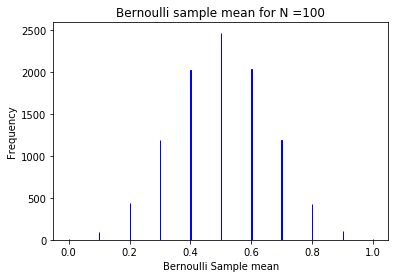

In [5]:
plt.hist(m, bins=1000,color='blue',edgecolor='blue')
plt.title('Bernoulli sample mean for N =100')
plt.xlabel('Bernoulli Sample mean')
plt.ylabel('Frequency')

Number of times sample mean is between the interval [mu+/-0.01]


In [6]:
time1=np.histogram(m, bins=[0.49,0.51])
print(time1)

(array([2472]), array([0.49, 0.51]))


Number of times sample mean is between the interval [mu+/-0.1]

In [7]:
time2=np.histogram(m, bins=[0.4,0.6])
print(time2)

(array([6534]), array([0.4, 0.6]))


In [8]:
time1=np.histogram(m, bins=[0.402,0.596])
print(time1)

(array([2472]), array([0.402, 0.596]))


Calculation of 95% confidence interval

In [9]:
s=np.sort(m)
h1=s[250]
h2=s[9749]
print("confidence interval",h1,h2)
time3=np.histogram(m, bins=[h1,h2])
print("sample means falling inside the CI",time3)
CI=(h2-h1)/2
print("epilson", CI)


confidence interval 0.2 0.8
sample means falling inside the CI (array([9787]), array([0.2, 0.8]))
epilson 0.30000000000000004


To find the number of times true mean fall outside the confidence interval

In [10]:
count=0
for i in range(10000):
  lower=m[i]-CI
  upper=m[i]+CI
  if lower<=0.5<=upper:
    count=count+1
outside=10000-count
print(outside)


213
